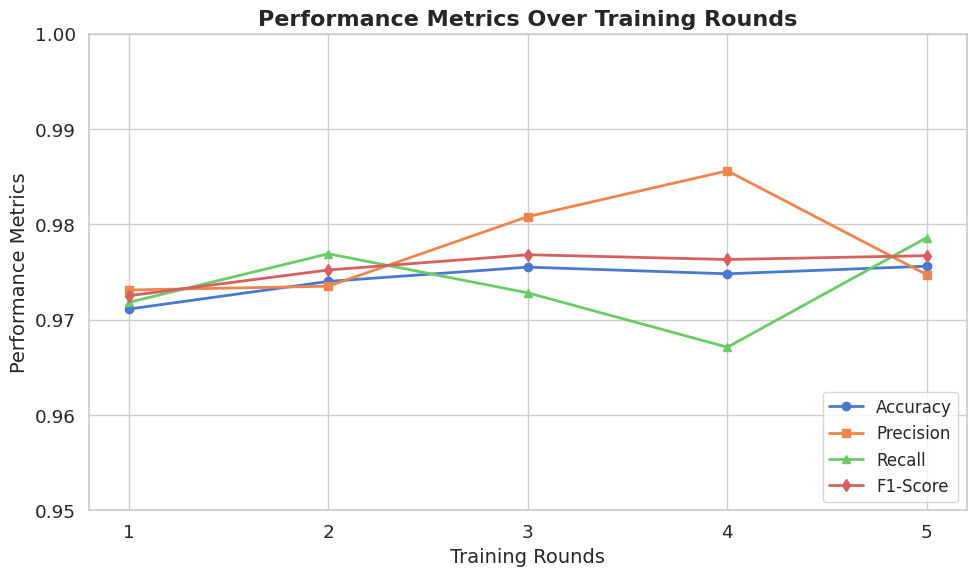

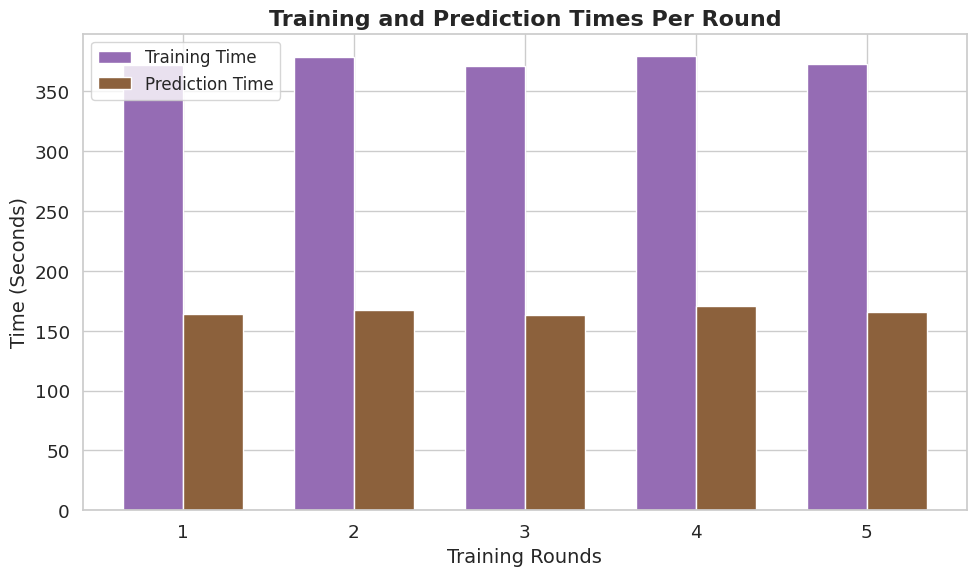

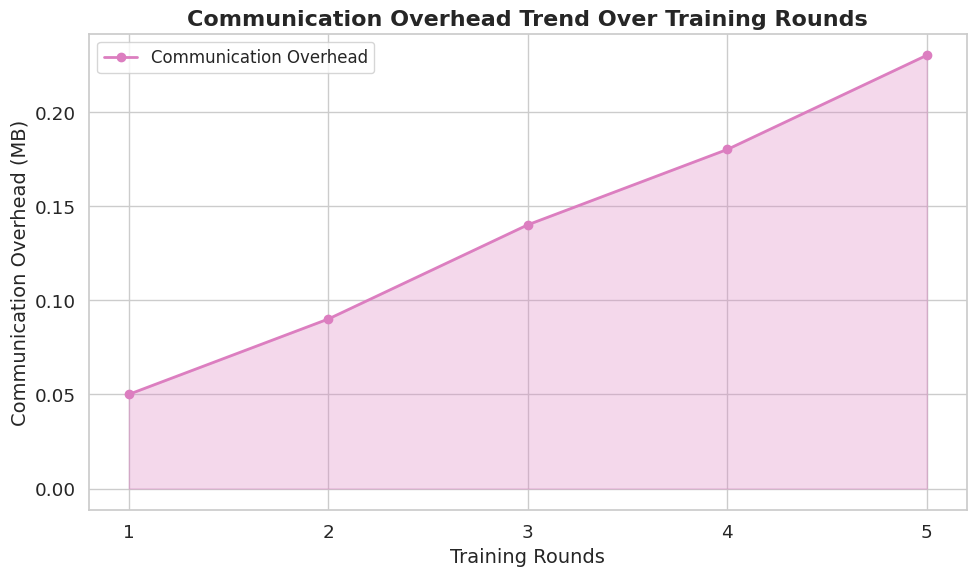

In [4]:
#FL non-IID

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
rounds = [1, 2, 3, 4, 5]
accuracy = [0.9711, 0.9740, 0.9755, 0.9748, 0.9756]
precision = [0.9731, 0.9735, 0.9808, 0.9856, 0.9747]
recall = [0.9718, 0.9769, 0.9728, 0.9671, 0.9786]
f1_score = [0.9725, 0.9752, 0.9768, 0.9763, 0.9767]
training_times = [372.5489, 378.5316, 370.9683, 379.4731, 372.6959]
prediction_times = [164.2114, 167.1857, 162.8774, 170.5898, 165.3789]
communication_overhead = [0.05, 0.09, 0.14, 0.18, 0.23]

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("muted")

# Plot 1: Performance Metrics Over Training Rounds
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy, marker='o', label='Accuracy', color=colors[0], linewidth=2)
plt.plot(rounds, precision, marker='s', label='Precision', color=colors[1], linewidth=2)
plt.plot(rounds, recall, marker='^', label='Recall', color=colors[2], linewidth=2)
plt.plot(rounds, f1_score, marker='d', label='F1-Score', color=colors[3], linewidth=2)
plt.title("Performance Metrics Over Training Rounds", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Performance Metrics", fontsize=14)
plt.ylim(0.95, 1.0)
plt.xticks(rounds)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("prfm_mtr_FL_non-IID.png", dpi=300)

# Plot 2: Resource Utilization Per Round (Training and Prediction Time)
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(rounds))
plt.bar(x - bar_width / 2, training_times, bar_width, label='Training Time', color=colors[4])
plt.bar(x + bar_width / 2, prediction_times, bar_width, label='Prediction Time', color=colors[5])
plt.title("Training and Prediction Times Per Round", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Time (Seconds)", fontsize=14)
plt.xticks(x, rounds)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("rsc_utlz_FL_non-IID.png", dpi=300)

# Plot 3: Communication Overhead Trend
plt.figure(figsize=(10, 6))
plt.plot(rounds, communication_overhead, marker='o', color=colors[6], linewidth=2, label="Communication Overhead")
plt.fill_between(rounds, communication_overhead, color=colors[6], alpha=0.3)
plt.title("Communication Overhead Trend Over Training Rounds", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Communication Overhead (MB)", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("cmc_ovh_FL_non-IID.png", dpi=300)

# Show all plots
plt.show()


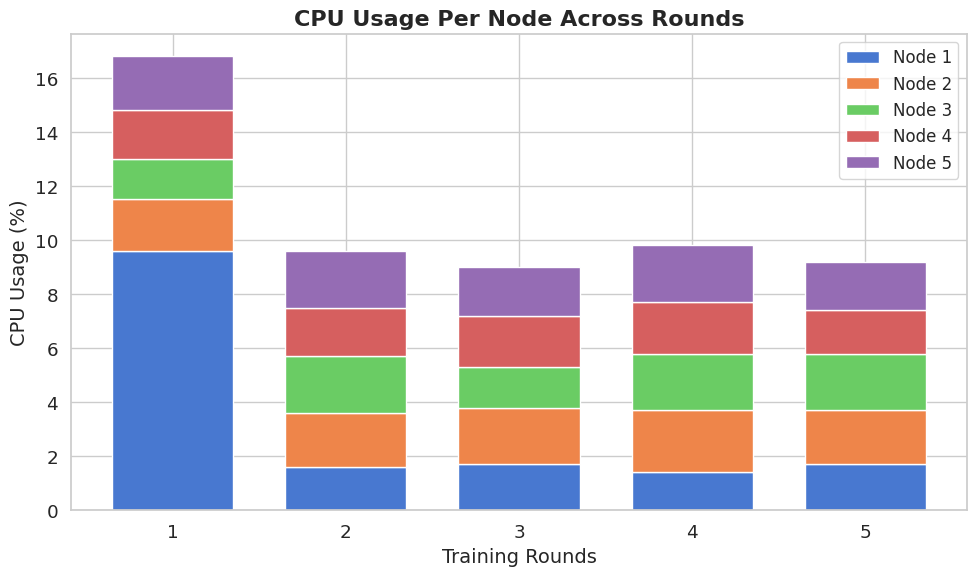

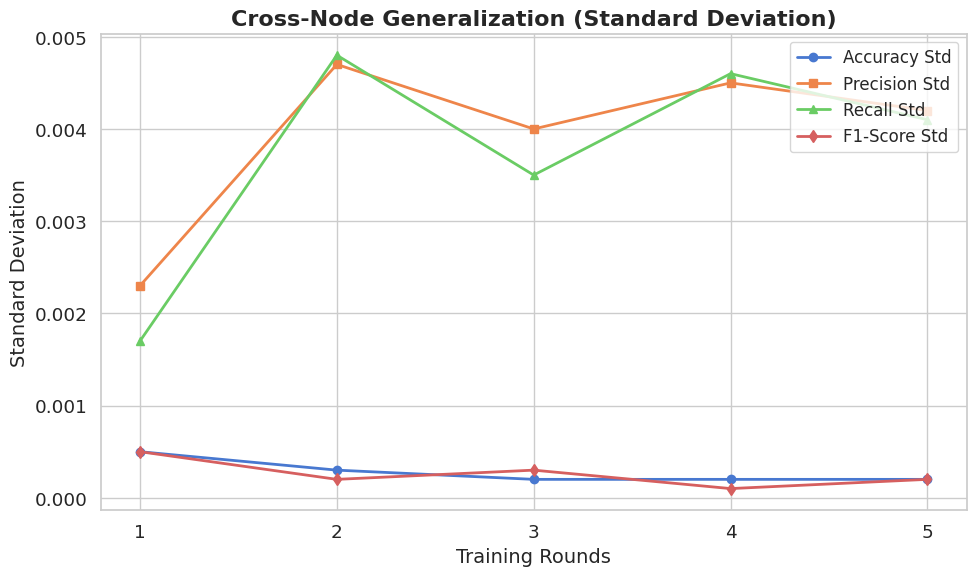

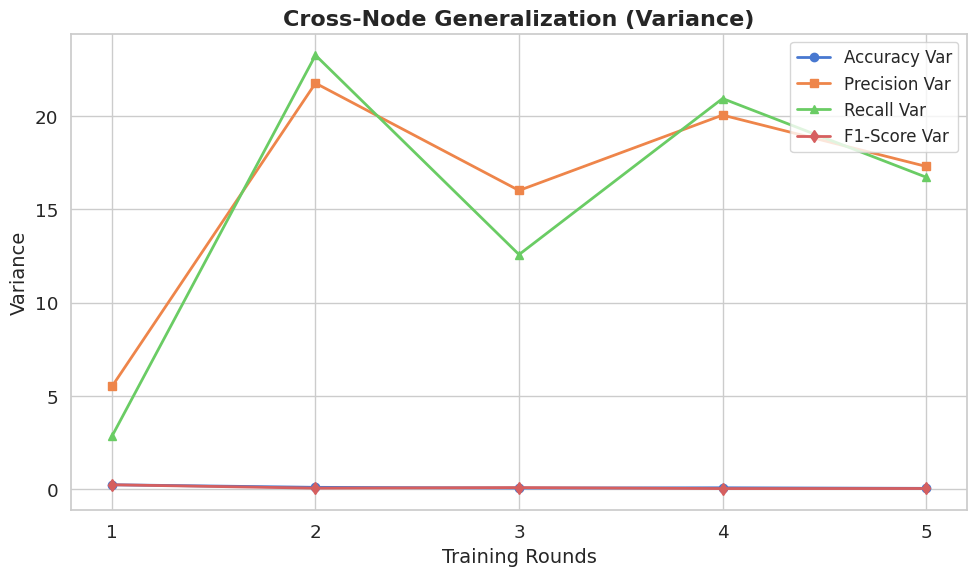

In [7]:
#FL non-IID

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
rounds = [1, 2, 3, 4, 5]

# CPU Usage Per Node
cpu_usage = {
    "Node 1": [9.6, 1.6, 1.7, 1.4, 1.7],
    "Node 2": [1.9, 2.0, 2.1, 2.3, 2.0],
    "Node 3": [1.5, 2.1, 1.5, 2.1, 2.1],
    "Node 4": [1.8, 1.8, 1.9, 1.9, 1.6],
    "Node 5": [2.0, 2.1, 1.8, 2.1, 1.8]
}

# Cross-Node Generalization Metrics
accuracy_std = [0.0005, 0.0003, 0.0002, 0.0002, 0.0002]
precision_std = [0.0023, 0.0047, 0.0040, 0.0045, 0.0042]
recall_std = [0.0017, 0.0048, 0.0035, 0.0046, 0.0041]
f1_std = [0.0005, 0.0002, 0.0003, 0.0001, 0.0002]

# Original values
accuracy_var = [
    2.2361301205364725e-07,
    8.599842402645663e-08,
    4.6639011372917596e-08,
    6.199668462159025e-08,
    3.166071365967582e-08
]

# Original values
precision_variance = [
    5.4984217362630256e-06,
    2.177539861406785e-05,
    1.601723766810892e-05,
    2.0062260435906865e-05,
    1.7308865991196854e-05
]

recall_variance = [
    2.8277778469032456e-06,
    2.3276092334754136e-05,
    1.2577281251537896e-05,
    2.095048706024727e-05,
    1.6730183096456132e-05
]

f1_variance = [
    2.240979654966586e-07,
    4.2240743919516046e-08,
    7.374124356758164e-08,
    1.943693497189616e-08,
    2.3953816334675236e-08
]

# Scaling factors
accuracy_var_scaled = [round(value * 1e6, 4) for value in accuracy_var]
precision_var_scaled = [round(value * 1e6, 4) for value in precision_variance]
recall_var_scaled = [round(value * 1e6, 4) for value in recall_variance]
f1_var_scaled = [round(value * 1e6, 4) for value in f1_variance]

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("muted")

# Plot 1: CPU Usage Per Node (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
x = np.arange(len(rounds))
width = 0.7  # Width of the bars

# Stack the CPU usage for each node
bottom = np.zeros(len(rounds))
for i, (node, usage) in enumerate(cpu_usage.items()):
    plt.bar(x, usage, width, label=node, bottom=bottom, color=colors[i])
    bottom += np.array(usage)

plt.title("CPU Usage Per Node Across Rounds", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("CPU Usage (%)", fontsize=14)
plt.xticks(x, rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("cpu_usg_FL_non-IID.png", dpi=300)

# Plot 2: Cross-Node Generalization Metrics (Line Plots)
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_std, marker="o", label="Accuracy Std", color=colors[0], linewidth=2)
plt.plot(rounds, precision_std, marker="s", label="Precision Std", color=colors[1], linewidth=2)
plt.plot(rounds, recall_std, marker="^", label="Recall Std", color=colors[2], linewidth=2)
plt.plot(rounds, f1_std, marker="d", label="F1-Score Std", color=colors[3], linewidth=2)

plt.title("Cross-Node Generalization (Standard Deviation)", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Standard Deviation", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("crs_gen_FL_non-IID.png", dpi=300)

plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_var_scaled, marker="o", label="Accuracy Var", color=colors[0], linewidth=2)
plt.plot(rounds, precision_var_scaled, marker="s", label="Precision Var", color=colors[1], linewidth=2)
plt.plot(rounds, recall_var_scaled, marker="^", label="Recall Var", color=colors[2], linewidth=2)
plt.plot(rounds, f1_var_scaled, marker="d", label="F1-Score Var", color=colors[3], linewidth=2)

plt.title("Cross-Node Generalization (Variance)", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Variance", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("crs_var_FL_non-IID.png", dpi=300)

# Show all plots
plt.show()


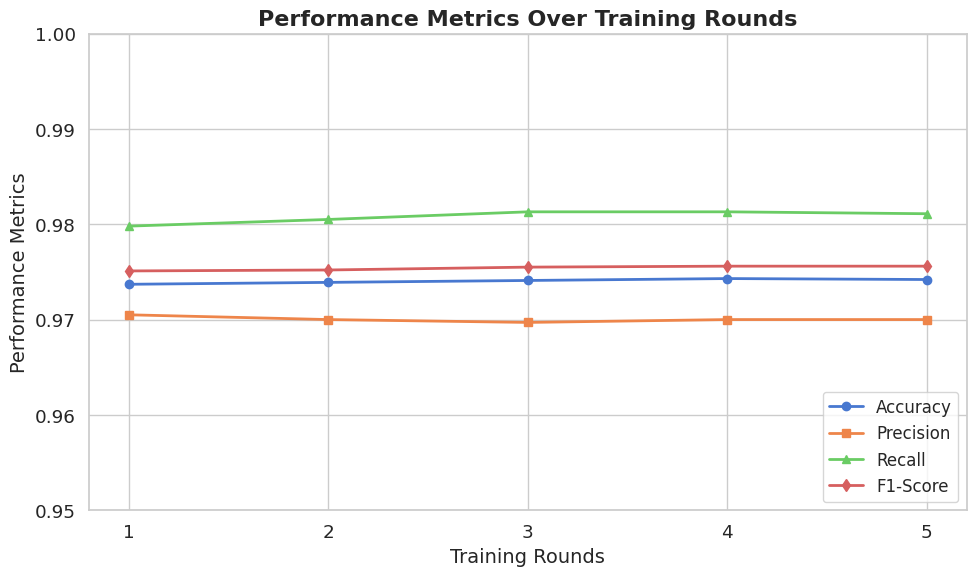

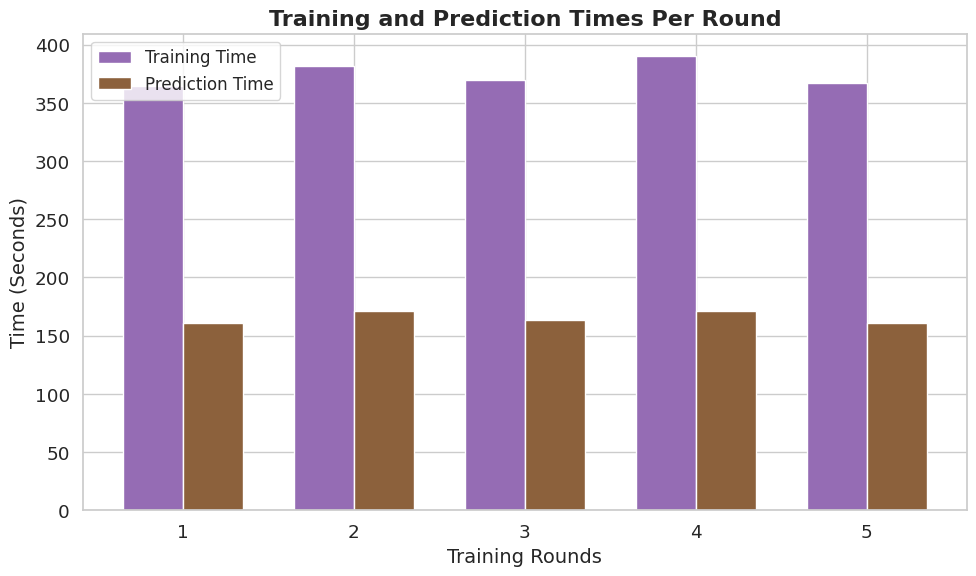

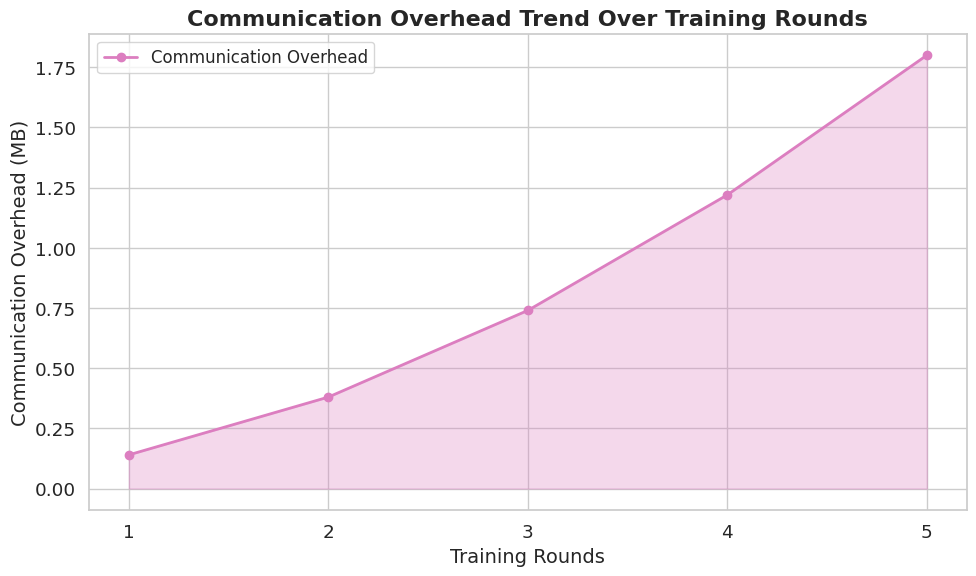

In [8]:
#ENS non-IID

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
rounds = [1, 2, 3, 4, 5]
accuracy = [0.9737, 0.9739, 0.9741, 0.9743, 0.9742]
precision = [0.9705, 0.9700, 0.9697, 0.9700, 0.9700]
recall = [0.9798, 0.9805, 0.9813, 0.9813, 0.9811]
f1_score = [0.9751, 0.9752, 0.9755, 0.9756, 0.9756]
training_times = [364.4480, 381.9160, 369.7615, 389.9313, 366.5833]
prediction_times = [160.7129, 170.9152, 163.4203, 171.3017, 160.7142]
communication_overhead = [0.14, 0.38, 0.74, 1.22, 1.80]

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("muted")

# Plot 1: Performance Metrics Over Training Rounds
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy, marker='o', label='Accuracy', color=colors[0], linewidth=2)
plt.plot(rounds, precision, marker='s', label='Precision', color=colors[1], linewidth=2)
plt.plot(rounds, recall, marker='^', label='Recall', color=colors[2], linewidth=2)
plt.plot(rounds, f1_score, marker='d', label='F1-Score', color=colors[3], linewidth=2)
plt.title("Performance Metrics Over Training Rounds", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Performance Metrics", fontsize=14)
plt.ylim(0.95, 1.0)
plt.xticks(rounds)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("prfm_mtr_ens_non-IID.png", dpi=300)

# Plot 2: Resource Utilization Per Round (Training and Prediction Time)
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(rounds))
plt.bar(x - bar_width / 2, training_times, bar_width, label='Training Time', color=colors[4])
plt.bar(x + bar_width / 2, prediction_times, bar_width, label='Prediction Time', color=colors[5])
plt.title("Training and Prediction Times Per Round", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Time (Seconds)", fontsize=14)
plt.xticks(x, rounds)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("rsc_utlz_ens_non-IID.png", dpi=300)

# Plot 3: Communication Overhead Trend
plt.figure(figsize=(10, 6))
plt.plot(rounds, communication_overhead, marker='o', color=colors[6], linewidth=2, label="Communication Overhead")
plt.fill_between(rounds, communication_overhead, color=colors[6], alpha=0.3)
plt.title("Communication Overhead Trend Over Training Rounds", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Communication Overhead (MB)", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("cmc_ovh_ens_non-IID.png", dpi=300)

# Show all plots
plt.show()


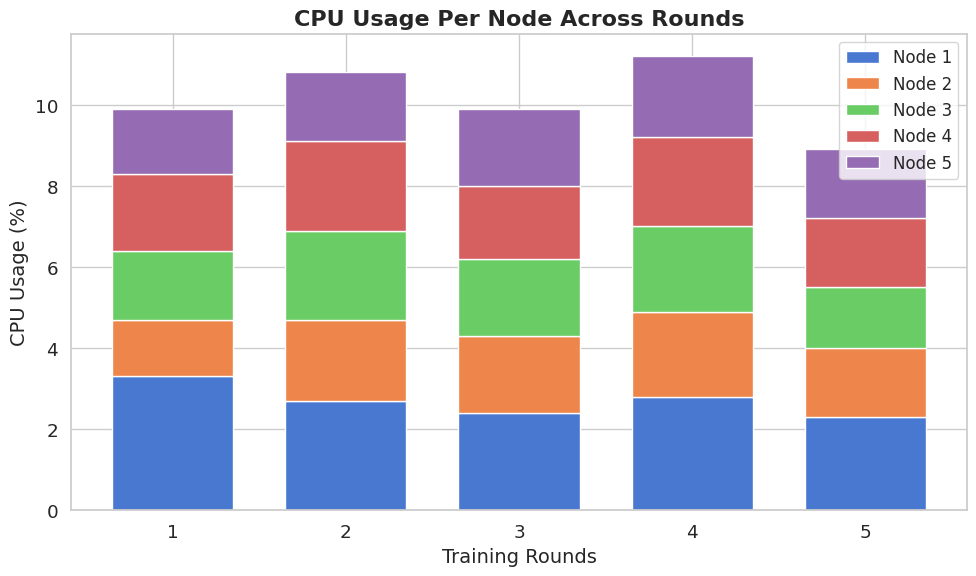

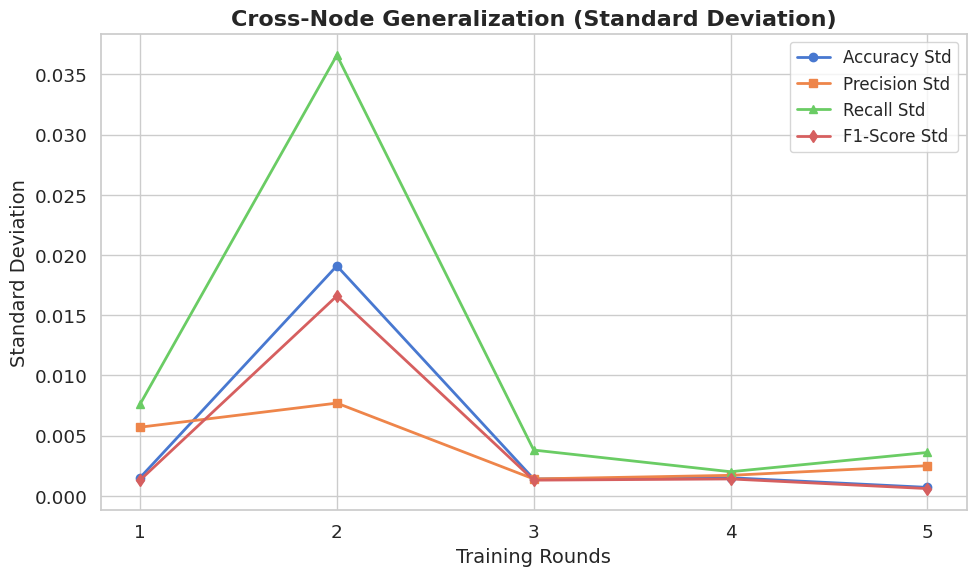

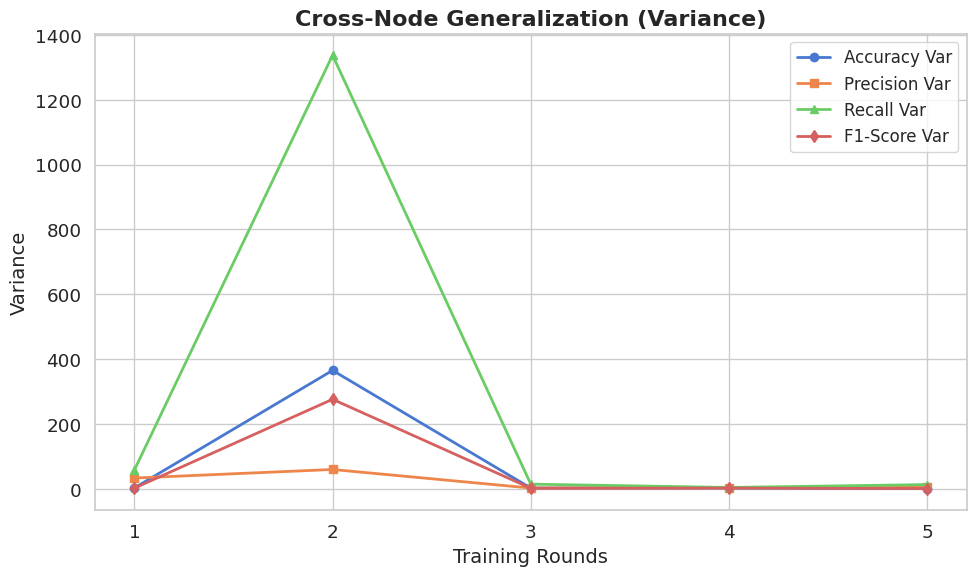

In [9]:
#ENS non-IID

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
rounds = [1, 2, 3, 4, 5]

# CPU Usage Per Node
cpu_usage = {
    "Node 1": [3.3, 2.7, 2.4, 2.8, 2.3],
    "Node 2": [1.4, 2.0, 1.9, 2.1, 1.7],
    "Node 3": [1.7, 2.2, 1.9, 2.1, 1.5],
    "Node 4": [1.9, 2.2, 1.8, 2.2, 1.7],
    "Node 5": [1.6, 1.7, 1.9, 2.0, 1.7]
}

# Cross-Node Generalization Metrics
accuracy_std = [0.0015, 0.0191, 0.0014, 0.0015, 0.0007]
precision_std = [0.0057, 0.0077, 0.0014, 0.0017, 0.0025]
recall_std = [0.0076, 0.0366, 0.0038, 0.0020, 0.0036]
f1_std = [0.0013, 0.0166, 0.0013, 0.0014, 0.0006]

# Updated values
accuracy_var = [
    2.395641997452458e-06,
    0.0003650269986289345,
    1.969377633770364e-06,
    2.1537405609706184e-06,
    5.486061701276412e-07
]

precision_variance = [
    3.2899153105745426e-05,
    5.932446622892939e-05,
    2.0403904520094326e-06,
    2.9503009406539602e-06,
    6.395320033050211e-06
]

recall_variance = [
    5.773316462921229e-05,
    0.0013373874446054401,
    1.4072754455298764e-05,
    3.876014066861444e-06,
    1.278486051745631e-05
]

f1_variance = [
    1.7805124030812717e-06,
    0.00027589663914954663,
    1.589489694825074e-06,
    1.9266001256663916e-06,
    4.185229646270674e-07
]

# Scaling factors
accuracy_var_scaled = [round(value * 1e6, 4) for value in accuracy_var]  # Scale by 10^6
precision_var_scaled = [round(value * 1e6, 4) for value in precision_variance]  # Scale by 10^6
recall_var_scaled = [round(value * 1e6, 4) for value in recall_variance]  # Scale by 10^6
f1_var_scaled = [round(value * 1e6, 4) for value in f1_variance]  # Scale by 10^6

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("muted")

# Plot 1: CPU Usage Per Node (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
x = np.arange(len(rounds))
width = 0.7  # Width of the bars

# Stack the CPU usage for each node
bottom = np.zeros(len(rounds))
for i, (node, usage) in enumerate(cpu_usage.items()):
    plt.bar(x, usage, width, label=node, bottom=bottom, color=colors[i])
    bottom += np.array(usage)

plt.title("CPU Usage Per Node Across Rounds", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("CPU Usage (%)", fontsize=14)
plt.xticks(x, rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("cpu_usg_ens_non-IID.png", dpi=300)

# Plot 2: Cross-Node Generalization Metrics (Line Plots)
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_std, marker="o", label="Accuracy Std", color=colors[0], linewidth=2)
plt.plot(rounds, precision_std, marker="s", label="Precision Std", color=colors[1], linewidth=2)
plt.plot(rounds, recall_std, marker="^", label="Recall Std", color=colors[2], linewidth=2)
plt.plot(rounds, f1_std, marker="d", label="F1-Score Std", color=colors[3], linewidth=2)

plt.title("Cross-Node Generalization (Standard Deviation)", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Standard Deviation", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("crs_gen_ens_non-IID.png", dpi=300)

plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_var_scaled, marker="o", label="Accuracy Var", color=colors[0], linewidth=2)
plt.plot(rounds, precision_var_scaled, marker="s", label="Precision Var", color=colors[1], linewidth=2)
plt.plot(rounds, recall_var_scaled, marker="^", label="Recall Var", color=colors[2], linewidth=2)
plt.plot(rounds, f1_var_scaled, marker="d", label="F1-Score Var", color=colors[3], linewidth=2)

plt.title("Cross-Node Generalization (Variance)", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Variance", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("crs_var_ens_non-IID.png", dpi=300)

# Show all plots
plt.show()


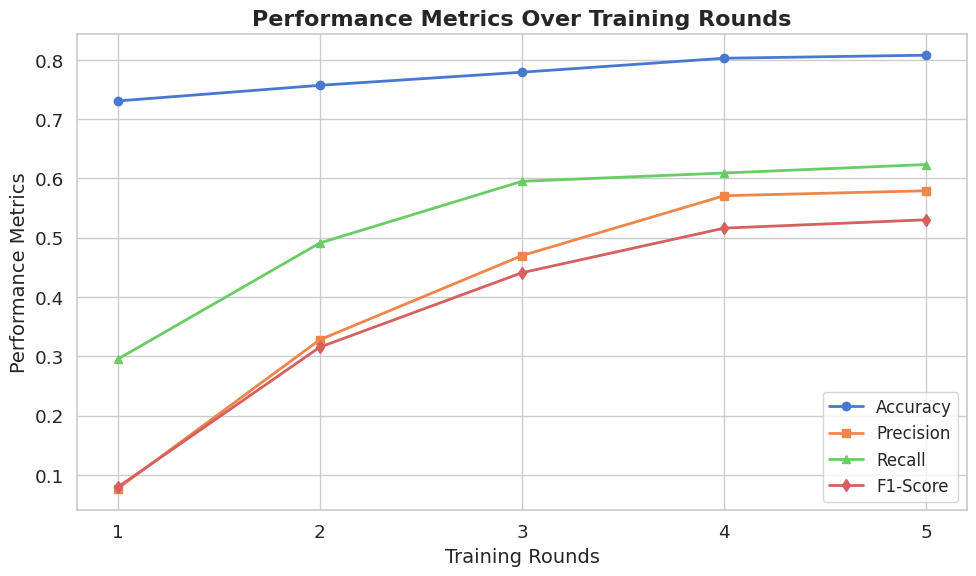

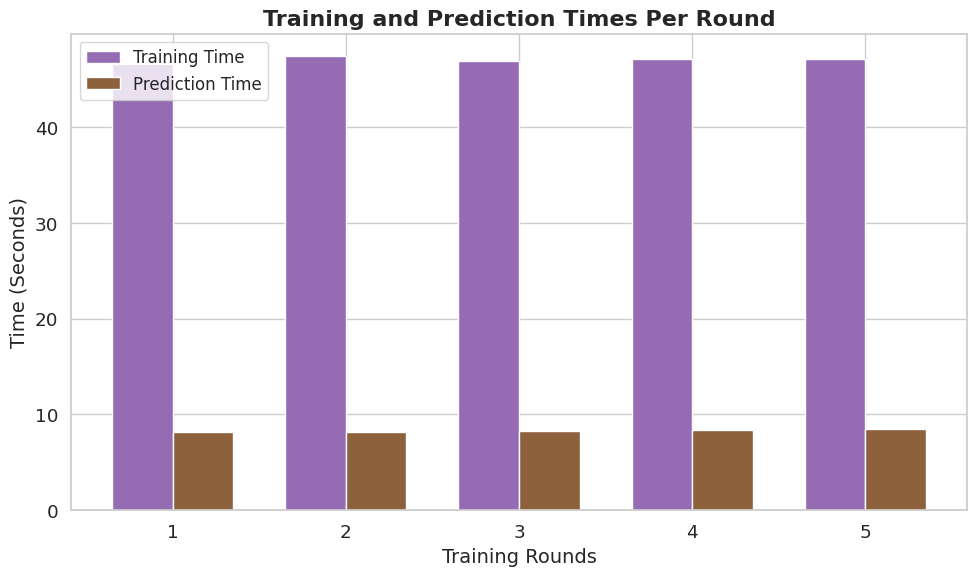

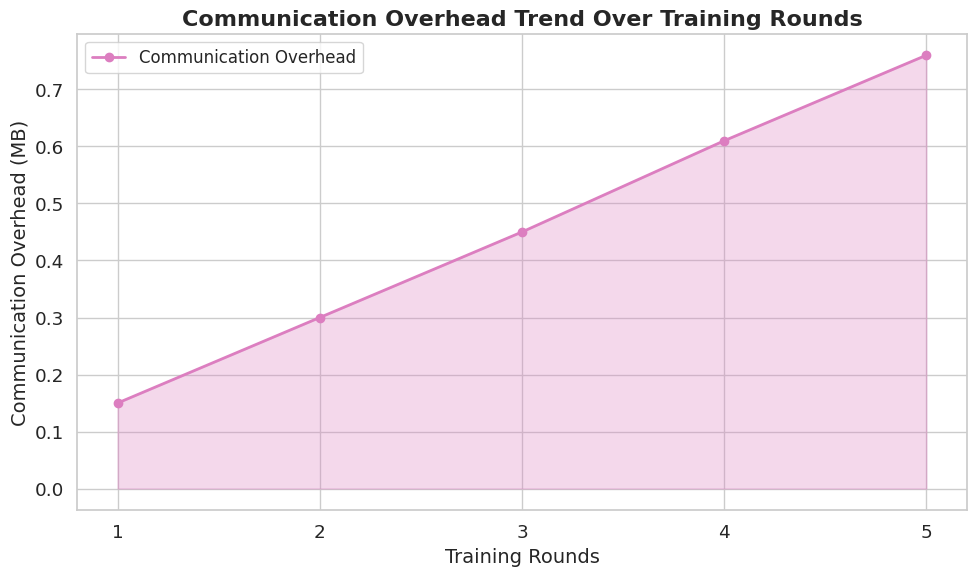

In [10]:
#FL non-IID Heterogen

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
rounds = [1, 2, 3, 4, 5]
accuracy = [0.7306, 0.7570, 0.7791, 0.8027, 0.8078]
precision = [0.0768, 0.3278, 0.4698, 0.5708, 0.5791]
recall = [0.2949, 0.4910, 0.5951, 0.6091, 0.6234]
f1_score = [0.0789, 0.3153, 0.4409, 0.5161, 0.5302]
training_times = [46.5662, 47.3940, 46.9316, 47.1567, 47.0789]
prediction_times = [8.1778, 8.1482, 8.2424, 8.3945, 8.4488]
communication_overhead = [0.15, 0.30, 0.45, 0.61, 0.76]

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("muted")

# Plot 1: Performance Metrics Over Training Rounds
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy, marker='o', label='Accuracy', color=colors[0], linewidth=2)
plt.plot(rounds, precision, marker='s', label='Precision', color=colors[1], linewidth=2)
plt.plot(rounds, recall, marker='^', label='Recall', color=colors[2], linewidth=2)
plt.plot(rounds, f1_score, marker='d', label='F1-Score', color=colors[3], linewidth=2)
plt.title("Performance Metrics Over Training Rounds", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Performance Metrics", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("prfm_mtr_FL_non-IID_heterogen.png", dpi=300)

# Plot 2: Resource Utilization Per Round (Training and Prediction Time)
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(rounds))
plt.bar(x - bar_width / 2, training_times, bar_width, label='Training Time', color=colors[4])
plt.bar(x + bar_width / 2, prediction_times, bar_width, label='Prediction Time', color=colors[5])
plt.title("Training and Prediction Times Per Round", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Time (Seconds)", fontsize=14)
plt.xticks(x, rounds)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("rsc_utlz_FL_non-IID_heterogen.png", dpi=300)

# Plot 3: Communication Overhead Trend
plt.figure(figsize=(10, 6))
plt.plot(rounds, communication_overhead, marker='o', color=colors[6], linewidth=2, label="Communication Overhead")
plt.fill_between(rounds, communication_overhead, color=colors[6], alpha=0.3)
plt.title("Communication Overhead Trend Over Training Rounds", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Communication Overhead (MB)", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("cmc_ovh_FL_non-IID_heterogen.png", dpi=300)

# Show all plots
plt.show()


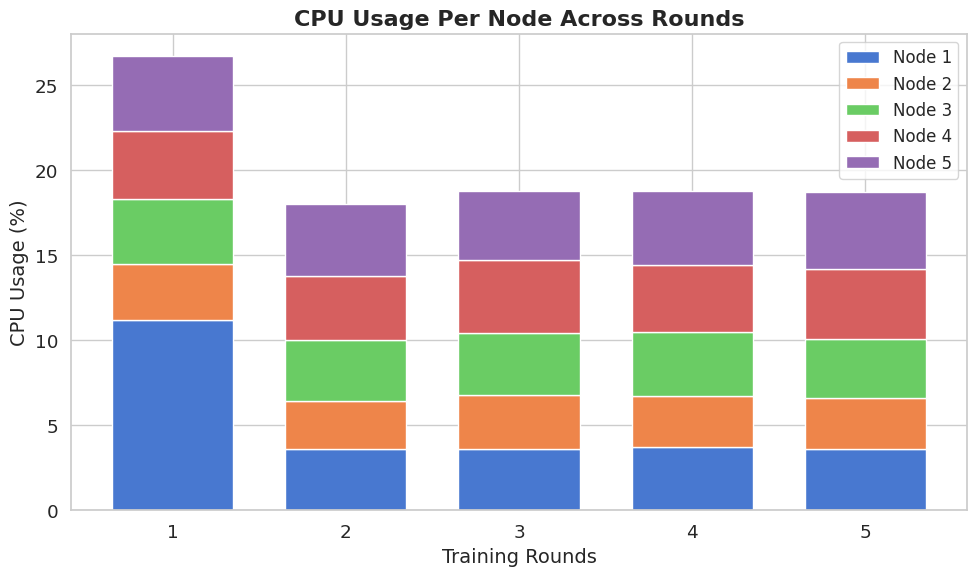

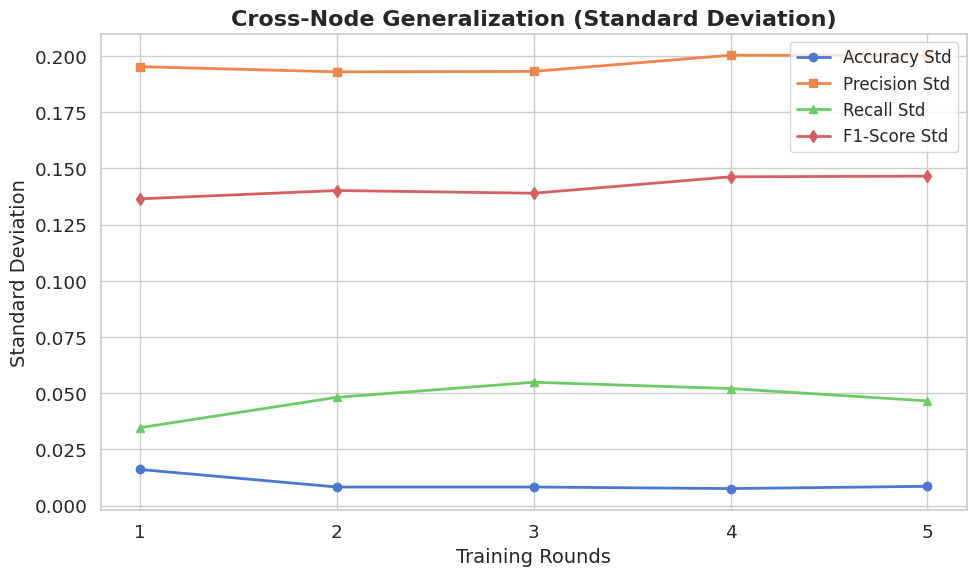

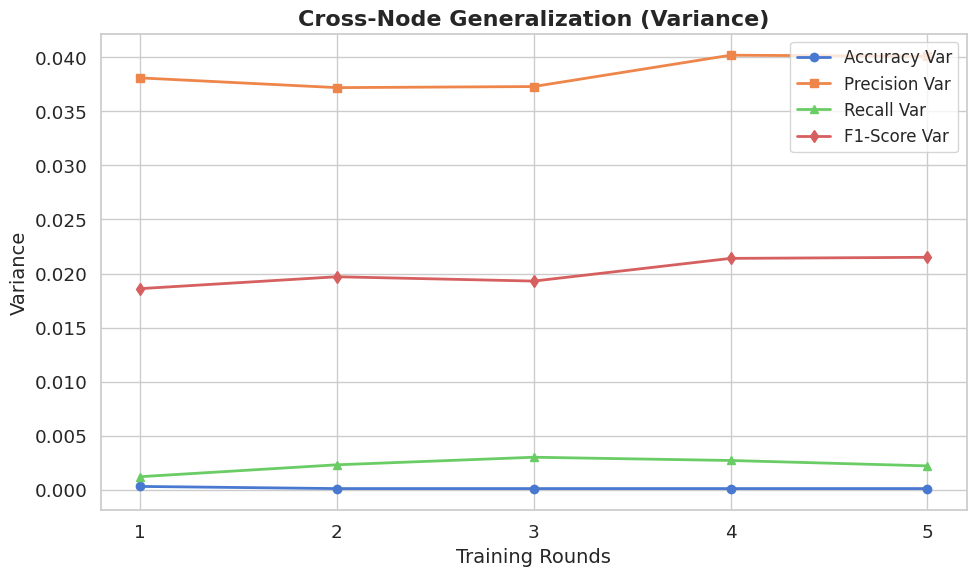

In [11]:
#FL non-IID Heterogen

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
rounds = [1, 2, 3, 4, 5]

# CPU Usage Per Node
cpu_usage = {
    "Node 1": [11.20, 3.60, 3.60, 3.70, 3.60],
    "Node 2": [3.30, 2.80, 3.20, 3.00, 3.00],
    "Node 3": [3.80, 3.60, 3.60, 3.80, 3.50],
    "Node 4": [4.00, 3.80, 4.30, 3.90, 4.10],
    "Node 5": [4.40, 4.20, 4.10, 4.40, 4.50]
}

# Cross-Node Generalization Metrics
accuracy_std = [0.0161, 0.0083, 0.0083, 0.0076, 0.0086]
precision_std = [0.1953, 0.1930, 0.1932, 0.2004, 0.2003]
recall_std = [0.0347, 0.0482, 0.0549, 0.0521, 0.0466]
f1_std = [0.1365, 0.1402, 0.1390, 0.1463, 0.1466]

# Variance Metrics
accuracy_var = [0.0003, 0.0001, 0.0001, 0.0001, 0.0001]
precision_var = [0.0381, 0.0372, 0.0373, 0.0402, 0.0401]
recall_var = [0.0012, 0.0023, 0.0030, 0.0027, 0.0022]
f1_var = [0.0186, 0.0197, 0.0193, 0.0214, 0.0215]

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("muted")

# Plot 1: CPU Usage Per Node (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
x = np.arange(len(rounds))
width = 0.7  # Width of the bars

# Stack the CPU usage for each node
bottom = np.zeros(len(rounds))
for i, (node, usage) in enumerate(cpu_usage.items()):
    plt.bar(x, usage, width, label=node, bottom=bottom, color=colors[i])
    bottom += np.array(usage)

plt.title("CPU Usage Per Node Across Rounds", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("CPU Usage (%)", fontsize=14)
plt.xticks(x, rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("cpu_usg_FL_non-IID_heterogen.png", dpi=300)

# Plot 2: Cross-Node Generalization Metrics (Line Plots)
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_std, marker="o", label="Accuracy Std", color=colors[0], linewidth=2)
plt.plot(rounds, precision_std, marker="s", label="Precision Std", color=colors[1], linewidth=2)
plt.plot(rounds, recall_std, marker="^", label="Recall Std", color=colors[2], linewidth=2)
plt.plot(rounds, f1_std, marker="d", label="F1-Score Std", color=colors[3], linewidth=2)

plt.title("Cross-Node Generalization (Standard Deviation)", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Standard Deviation", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("crs_gen_std_FL_non-IID_heterogen.png", dpi=300)

plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_var, marker="o", label="Accuracy Var", color=colors[0], linewidth=2)
plt.plot(rounds, precision_var, marker="s", label="Precision Var", color=colors[1], linewidth=2)
plt.plot(rounds, recall_var, marker="^", label="Recall Var", color=colors[2], linewidth=2)
plt.plot(rounds, f1_var, marker="d", label="F1-Score Var", color=colors[3], linewidth=2)

plt.title("Cross-Node Generalization (Variance)", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Variance", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("crs_gen_var_FL_non-IID.png", dpi=300)

# Show all plots
plt.show()


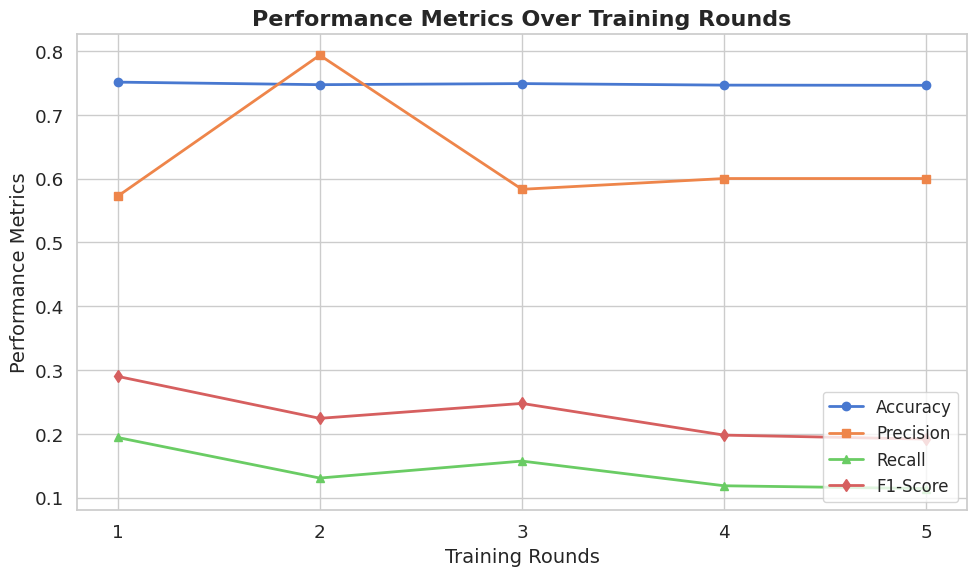

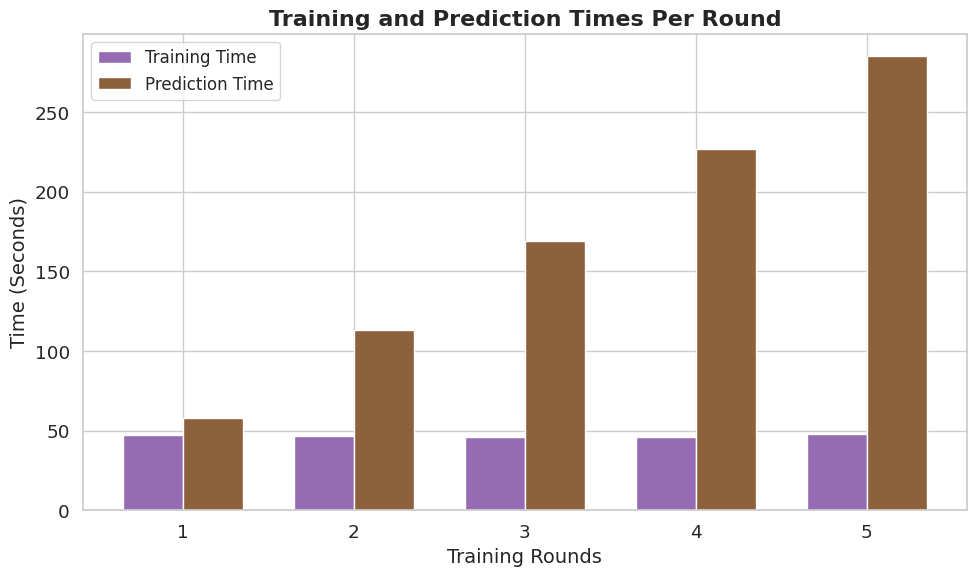

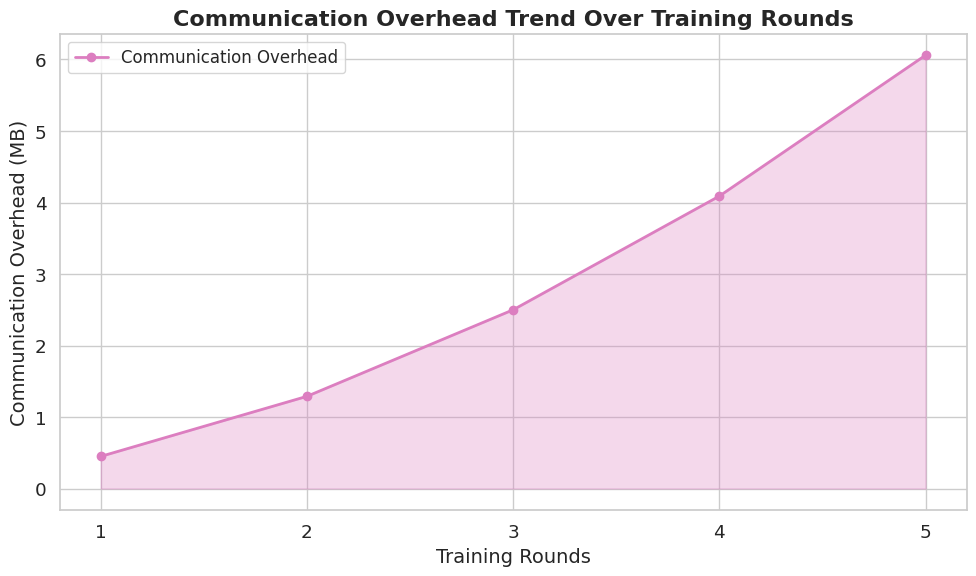

In [16]:
#ENS non-IID Heterogen

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
rounds = [1, 2, 3, 4, 5]
accuracy = [0.7511, 0.7471, 0.7488, 0.7464, 0.7461]
precision = [0.5721, 0.7933, 0.5831, 0.6000, 0.6000]
recall = [0.1941, 0.1305, 0.1571, 0.1184, 0.1140]
f1_score = [0.2899, 0.2241, 0.2475, 0.1978, 0.1916]
training_times = [47.0850, 46.5213, 46.1768, 45.7111, 47.7953]
prediction_times = [58.1105, 113.1293, 169.1532, 226.4836, 284.9541]
communication_overhead = [0.45, 1.29, 2.50, 4.09, 6.06]

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("muted")

# Plot 1: Performance Metrics Over Training Rounds
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy, marker='o', label='Accuracy', color=colors[0], linewidth=2)
plt.plot(rounds, precision, marker='s', label='Precision', color=colors[1], linewidth=2)
plt.plot(rounds, recall, marker='^', label='Recall', color=colors[2], linewidth=2)
plt.plot(rounds, f1_score, marker='d', label='F1-Score', color=colors[3], linewidth=2)
plt.title("Performance Metrics Over Training Rounds", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Performance Metrics", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("prfm_mtr_ens_non-IID_heterogen.png", dpi=300)

# Plot 2: Resource Utilization Per Round (Training and Prediction Time)
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(rounds))
plt.bar(x - bar_width / 2, training_times, bar_width, label='Training Time', color=colors[4])
plt.bar(x + bar_width / 2, prediction_times, bar_width, label='Prediction Time', color=colors[5])
plt.title("Training and Prediction Times Per Round", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Time (Seconds)", fontsize=14)
plt.xticks(x, rounds)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("rsc_utlz_ens_non-IID_heterogen.png", dpi=300)

# Plot 3: Communication Overhead Trend
plt.figure(figsize=(10, 6))
plt.plot(rounds, communication_overhead, marker='o', color=colors[6], linewidth=2, label="Communication Overhead")
plt.fill_between(rounds, communication_overhead, color=colors[6], alpha=0.3)
plt.title("Communication Overhead Trend Over Training Rounds", fontsize=16, weight='bold')
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Communication Overhead (MB)", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("cmc_ovh_ens_non-IID_heterogen.png", dpi=300)

# Show all plots
plt.show()


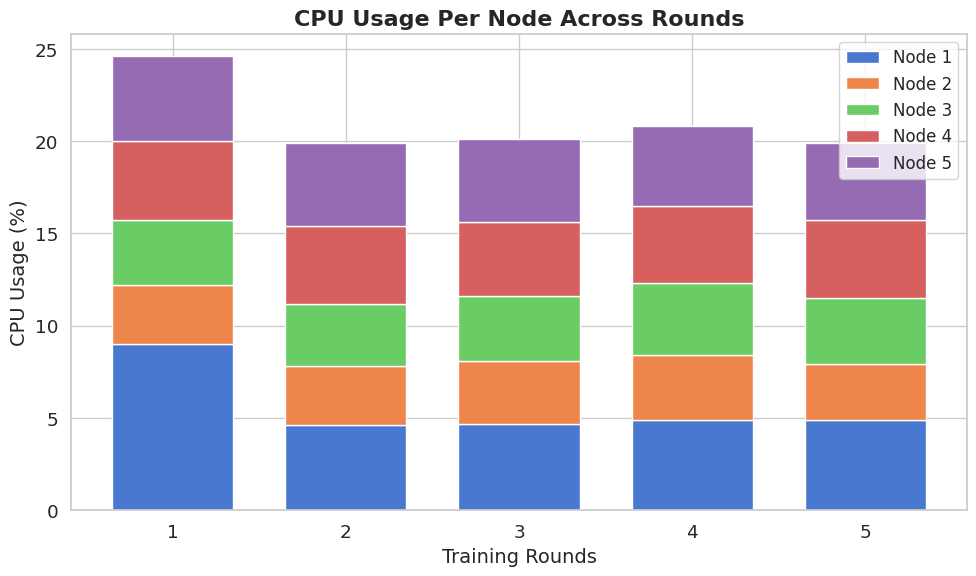

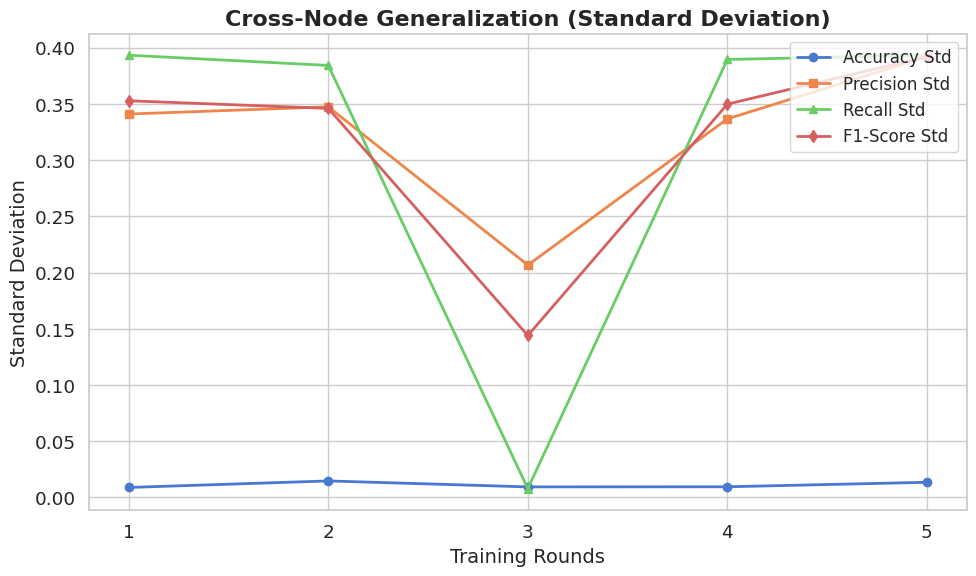

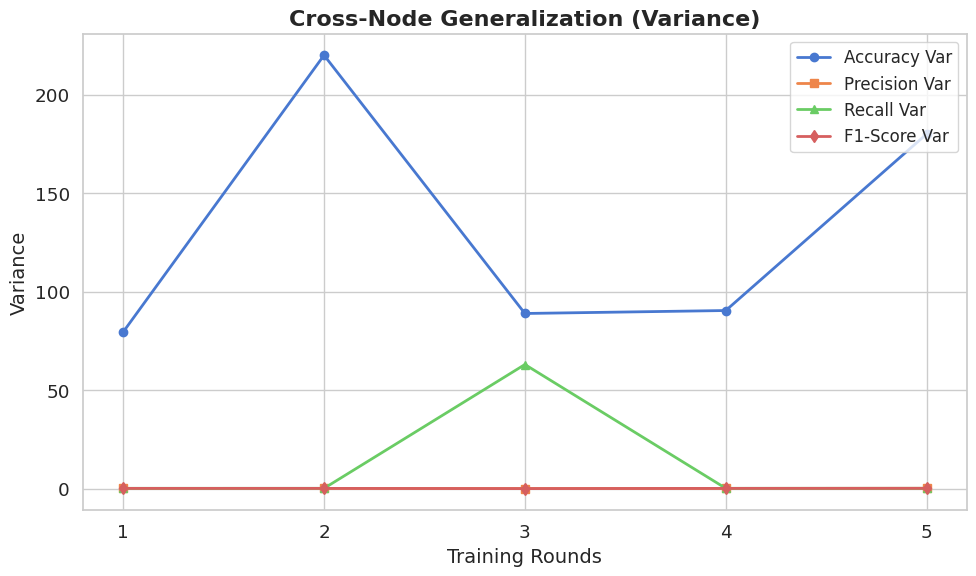

In [15]:
#ENS non-IID Heterogen

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
rounds = [1, 2, 3, 4, 5]

# CPU Usage Per Node
cpu_usage = {
    "Node 1": [9.00, 4.60, 4.70, 4.90, 4.90],
    "Node 2": [3.20, 3.20, 3.40, 3.50, 3.00],
    "Node 3": [3.50, 3.40, 3.50, 3.90, 3.60],
    "Node 4": [4.30, 4.20, 4.00, 4.20, 4.20],
    "Node 5": [4.60, 4.50, 4.50, 4.30, 4.20]
}

# Cross-Node Generalization Metrics
accuracy_std = [0.0089, 0.0147, 0.0094, 0.0095, 0.0135]
precision_std = [0.3409, 0.3473, 0.2066, 0.3366, 0.3918]
recall_std = [0.3932, 0.3841, 0.0079, 0.3894, 0.3932]
f1_std = [0.3527, 0.3459, 0.1440, 0.3497, 0.3919]

# Original Data
accuracy_var = [7.95e-05, 0.00022, 8.89e-05, 9.04e-05, 0.00018]
precision_var = [0.1162, 0.1206, 0.0427, 0.1133, 0.1535]
recall_var = [0.1546, 0.1475, 6.30e-05, 0.1517, 0.1546]
f1_var = [0.1244, 0.1196, 0.0207, 0.1223, 0.1536]

# Scaling factors for variables with very small values
accuracy_var_scaled = [round(value * 1e6, 4) for value in accuracy_var]  # Scale by 10^6
precision_var_scaled = precision_var  # No scaling applied; already reasonable range
recall_var_scaled = [
    round(value * 1e6, 4) if value < 0.001 else value for value in recall_var
]  # Scale only small values
f1_var_scaled = f1_var  # No scaling applied; already reasonable range

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("muted")

# Plot 1: CPU Usage Per Node (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
x = np.arange(len(rounds))
width = 0.7  # Width of the bars

# Stack the CPU usage for each node
bottom = np.zeros(len(rounds))
for i, (node, usage) in enumerate(cpu_usage.items()):
    plt.bar(x, usage, width, label=node, bottom=bottom, color=colors[i])
    bottom += np.array(usage)

plt.title("CPU Usage Per Node Across Rounds", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("CPU Usage (%)", fontsize=14)
plt.xticks(x, rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("cpu_usg_ens_non-IID_heterogen.png", dpi=300)

# Plot 2: Cross-Node Generalization Metrics (Line Plots)
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_std, marker="o", label="Accuracy Std", color=colors[0], linewidth=2)
plt.plot(rounds, precision_std, marker="s", label="Precision Std", color=colors[1], linewidth=2)
plt.plot(rounds, recall_std, marker="^", label="Recall Std", color=colors[2], linewidth=2)
plt.plot(rounds, f1_std, marker="d", label="F1-Score Std", color=colors[3], linewidth=2)

plt.title("Cross-Node Generalization (Standard Deviation)", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Standard Deviation", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("crs_gen_std_ens_non-IID_heterogen.png", dpi=300)

plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_var_scaled, marker="o", label="Accuracy Var", color=colors[0], linewidth=2)
plt.plot(rounds, precision_var_scaled, marker="s", label="Precision Var", color=colors[1], linewidth=2)
plt.plot(rounds, recall_var_scaled, marker="^", label="Recall Var", color=colors[2], linewidth=2)
plt.plot(rounds, f1_var_scaled, marker="d", label="F1-Score Var", color=colors[3], linewidth=2)

plt.title("Cross-Node Generalization (Variance)", fontsize=16, weight="bold")
plt.xlabel("Training Rounds", fontsize=14)
plt.ylabel("Variance", fontsize=14)
plt.xticks(rounds)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("crs_gen_var_ens_non-IID_heterogen.png", dpi=300)

# Show all plots
plt.show()
